### Linear Experiments

Here are linear experiments when the diversity condition holds.

Each experiment is performed by using MLP and Linear Encoder

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), '..'))

import torch

from spaces import NSphereSpace

from simclr.simclr import SimCLR

from visualization_utils.spheres import visualize_spheres_side_by_side
import matplotlib.pyplot as plt

In [ ]:
# Training an encoder where we map from Sphere to R^4 injectively and then map back to the sphere

from experiment_utils.linear import perform_linear_experiment, linear_unrotation
import torch.nn as nn

from visualization_utils.scoring import plot_scores
from visualization_utils.spheres import scatter3d_sphere
from encoders import SphericalEncoder, LinearEncoder

latent_dim = 3

tau = 0.3
kappa = 1 / tau

iterations_default = 20000
batch_default = 6144

# torch.manual_seed(789)

sphere = NSphereSpace(latent_dim)

sample_pair_fixed = lambda batch: sphere.sample_pair_vmf(batch, kappa)
sample_uniform_fixed = lambda batch: sphere.uniform(batch)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


def get_spherical_encoder(input_dim, output_dim):
    return SphericalEncoder(input_dim, [128, 256, 256, 256, 128], output_dim)


def get_linear_encoder(input_dim, output_dim):
    return LinearEncoder(input_dim, output_dim)


def perform_experiment(dimension, encoder_type, its):
    input_dim = dimension
    output_dim = 3

    f = get_linear_encoder(input_dim, output_dim) if encoder_type == 'linear' else get_spherical_encoder(input_dim, output_dim)
    h, scores = perform_linear_experiment(
        input_dim, 
        its, 
        batch_default, 
        latent_dim, 
        sample_pair_fixed, 
        sample_uniform_fixed, 
        tau, 
        device, 
        f=f
    )

    plot_scores(plt, scores)

    z = sphere.uniform(1000).to(device)
    z_enc = h(z)

    visualize_spheres_side_by_side(plt, z.cpu(), z_enc.cpu())

    z = sphere.uniform(100000)
    z_enc = h(z.cuda()).cpu()
    
    fig = scatter3d_sphere(plt, z.cpu(), z_enc, s=10, a=.8)
    fig = scatter3d_sphere(plt, z.cpu(), z.cpu(), s=10, a=.8)
    
    # Unrotation
    z_unrotated = linear_unrotation(z, z_enc)
    fig = scatter3d_sphere(plt, z.cpu(), z_unrotated, s=10, a=.8)


print('Using device', device)

## Experiment: Linear map to 4 dimensions, MLP Encoder

/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Linear control score: 1.0
Permutation control score: 1.0


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 9.279266357421875 Pos Loss: -0.9715108275413513 Neg Loss: 10.250777244567871 Samples processed: 1 linear disentanglement: 0.22770269215106964 permutation disentanglement: 0.3875798751921197 angle_preservation_error: 0.28854525089263916


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.884787082672119 Pos Loss: -2.2814881801605225 Neg Loss: 10.166275978088379 Samples processed: 21 linear disentanglement: 0.974619448184967 permutation disentanglement: 0.8075798527920615 angle_preservation_error: 0.05190179869532585


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.822425842285156 Pos Loss: -2.3370211124420166 Neg Loss: 10.15944766998291 Samples processed: 41 linear disentanglement: 0.994663655757904 permutation disentanglement: 0.8100496175637146 angle_preservation_error: 0.024370839819312096


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.84013032913208 Pos Loss: -2.318876028060913 Neg Loss: 10.15900707244873 Samples processed: 61 linear disentanglement: 0.9973285794258118 permutation disentanglement: 0.8096708541325133 angle_preservation_error: 0.016650782898068428


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.837482452392578 Pos Loss: -2.321661949157715 Neg Loss: 10.159144401550293 Samples processed: 81 linear disentanglement: 0.99810391664505 permutation disentanglement: 0.8142921096417369 angle_preservation_error: 0.014034641906619072


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.825846195220947 Pos Loss: -2.3330609798431396 Neg Loss: 10.158907890319824 Samples processed: 101 linear disentanglement: 0.9983699917793274 permutation disentanglement: 0.8123924664945391 angle_preservation_error: 0.013059156015515327


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.802443981170654 Pos Loss: -2.3563969135284424 Neg Loss: 10.15884017944336 Samples processed: 121 linear disentanglement: 0.9986726641654968 permutation disentanglement: 0.8110600505058683 angle_preservation_error: 0.011887469328939915


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.828378200531006 Pos Loss: -2.3304312229156494 Neg Loss: 10.158809661865234 Samples processed: 141 linear disentanglement: 0.9986109733581543 permutation disentanglement: 0.8162156907599479 angle_preservation_error: 0.011960851028561592


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.806280612945557 Pos Loss: -2.3527870178222656 Neg Loss: 10.15906810760498 Samples processed: 161 linear disentanglement: 0.9987673759460449 permutation disentanglement: 0.8165493192330596 angle_preservation_error: 0.011504778638482094


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.81341028213501 Pos Loss: -2.3455498218536377 Neg Loss: 10.15895938873291 Samples processed: 181 linear disentanglement: 0.9986956715583801 permutation disentanglement: 0.8127046561988278 angle_preservation_error: 0.01179978996515274


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.847712993621826 Pos Loss: -2.311185121536255 Neg Loss: 10.158897399902344 Samples processed: 201 linear disentanglement: 0.9989156723022461 permutation disentanglement: 0.8156889527415013 angle_preservation_error: 0.011016491800546646


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.797418117523193 Pos Loss: -2.361677408218384 Neg Loss: 10.159096717834473 Samples processed: 221 linear disentanglement: 0.998864471912384 permutation disentanglement: 0.8145584973898826 angle_preservation_error: 0.011520194821059704


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.82128381729126 Pos Loss: -2.337681531906128 Neg Loss: 10.158965110778809 Samples processed: 241 linear disentanglement: 0.998836100101471 permutation disentanglement: 0.8144355046901067 angle_preservation_error: 0.01128915324807167


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.823933124542236 Pos Loss: -2.3350131511688232 Neg Loss: 10.158946990966797 Samples processed: 261 linear disentanglement: 0.9989302158355713 permutation disentanglement: 0.8135378905577021 angle_preservation_error: 0.010522185824811459


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.817460536956787 Pos Loss: -2.3415400981903076 Neg Loss: 10.159000396728516 Samples processed: 281 linear disentanglement: 0.9987313151359558 permutation disentanglement: 0.8137325466103335 angle_preservation_error: 0.012375024147331715


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.793521881103516 Pos Loss: -2.3655505180358887 Neg Loss: 10.159071922302246 Samples processed: 301 linear disentanglement: 0.9987906813621521 permutation disentanglement: 0.8150919190469988 angle_preservation_error: 0.012396370060741901


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.804569244384766 Pos Loss: -2.354349374771118 Neg Loss: 10.158917427062988 Samples processed: 321 linear disentanglement: 0.9988067746162415 permutation disentanglement: 0.8123897451112092 angle_preservation_error: 0.01168704405426979


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.844341278076172 Pos Loss: -2.3145911693573 Neg Loss: 10.158931732177734 Samples processed: 341 linear disentanglement: 0.9989075064659119 permutation disentanglement: 0.8156654541327856 angle_preservation_error: 0.010947038419544697


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.843667507171631 Pos Loss: -2.315211534500122 Neg Loss: 10.158879280090332 Samples processed: 361 linear disentanglement: 0.9988927841186523 permutation disentanglement: 0.8120326727215444 angle_preservation_error: 0.011699618771672249


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.82526159286499 Pos Loss: -2.3335065841674805 Neg Loss: 10.158769607543945 Samples processed: 381 linear disentanglement: 0.9990944862365723 permutation disentanglement: 0.8154632168850146 angle_preservation_error: 0.010376679711043835


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.819423675537109 Pos Loss: -2.3396666049957275 Neg Loss: 10.159090042114258 Samples processed: 401 linear disentanglement: 0.9990838170051575 permutation disentanglement: 0.8124461838041014 angle_preservation_error: 0.009923053905367851


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.836605548858643 Pos Loss: -2.3224680423736572 Neg Loss: 10.159074783325195 Samples processed: 421 linear disentanglement: 0.9989821314811707 permutation disentanglement: 0.8114357168871119 angle_preservation_error: 0.011068755760788918


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.820603847503662 Pos Loss: -2.33829402923584 Neg Loss: 10.158897399902344 Samples processed: 441 linear disentanglement: 0.9988725781440735 permutation disentanglement: 0.8114377630801192 angle_preservation_error: 0.011405005119740963


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.803252696990967 Pos Loss: -2.355642557144165 Neg Loss: 10.158895492553711 Samples processed: 461 linear disentanglement: 0.9989984035491943 permutation disentanglement: 0.8135143397691144 angle_preservation_error: 0.010922403074800968


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.815830707550049 Pos Loss: -2.3431594371795654 Neg Loss: 10.158989906311035 Samples processed: 481 linear disentanglement: 0.9991176128387451 permutation disentanglement: 0.8120133812253142 angle_preservation_error: 0.009663153439760208


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.834408283233643 Pos Loss: -2.3248188495635986 Neg Loss: 10.159226417541504 Samples processed: 501 linear disentanglement: 0.9990866184234619 permutation disentanglement: 0.8104642481722352 angle_preservation_error: 0.01102431956678629


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.8271942138671875 Pos Loss: -2.3318324089050293 Neg Loss: 10.159026145935059 Samples processed: 521 linear disentanglement: 0.9991046786308289 permutation disentanglement: 0.811406362515296 angle_preservation_error: 0.009986888617277145


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.792042255401611 Pos Loss: -2.367013931274414 Neg Loss: 10.159056663513184 Samples processed: 541 linear disentanglement: 0.9990753531455994 permutation disentanglement: 0.8065052630625057 angle_preservation_error: 0.010046527720987797


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.812389373779297 Pos Loss: -2.3467979431152344 Neg Loss: 10.159186363220215 Samples processed: 561 linear disentanglement: 0.9990717768669128 permutation disentanglement: 0.8097668151381668 angle_preservation_error: 0.010216046124696732


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.798454761505127 Pos Loss: -2.3606576919555664 Neg Loss: 10.159112930297852 Samples processed: 581 linear disentanglement: 0.9989952445030212 permutation disentanglement: 0.8096424545127886 angle_preservation_error: 0.011427104473114014


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.813018798828125 Pos Loss: -2.3460986614227295 Neg Loss: 10.159117698669434 Samples processed: 601 linear disentanglement: 0.9992043972015381 permutation disentanglement: 0.8114904366730804 angle_preservation_error: 0.009367532096803188


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.814158916473389 Pos Loss: -2.3447444438934326 Neg Loss: 10.158903121948242 Samples processed: 621 linear disentanglement: 0.9988484978675842 permutation disentanglement: 0.8106322942409087 angle_preservation_error: 0.011964425444602966


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.835838317871094 Pos Loss: -2.323185920715332 Neg Loss: 10.159024238586426 Samples processed: 641 linear disentanglement: 0.9990624785423279 permutation disentanglement: 0.8087277551672404 angle_preservation_error: 0.009990820661187172


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.819934368133545 Pos Loss: -2.3390769958496094 Neg Loss: 10.159010887145996 Samples processed: 661 linear disentanglement: 0.9990475177764893 permutation disentanglement: 0.8087185929923852 angle_preservation_error: 0.010228034108877182


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.816691875457764 Pos Loss: -2.342205286026001 Neg Loss: 10.158896446228027 Samples processed: 681 linear disentanglement: 0.9992944598197937 permutation disentanglement: 0.8075092380146436 angle_preservation_error: 0.009694504551589489


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.810261249542236 Pos Loss: -2.3485147953033447 Neg Loss: 10.158775329589844 Samples processed: 701 linear disentanglement: 0.9990300536155701 permutation disentanglement: 0.8040052824007596 angle_preservation_error: 0.010460701771080494


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.817033290863037 Pos Loss: -2.341958522796631 Neg Loss: 10.158991813659668 Samples processed: 721 linear disentanglement: 0.999068021774292 permutation disentanglement: 0.8076208666931403 angle_preservation_error: 0.010667413473129272


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.825747013092041 Pos Loss: -2.3331756591796875 Neg Loss: 10.158923149108887 Samples processed: 741 linear disentanglement: 0.9991227984428406 permutation disentanglement: 0.8111854630578005 angle_preservation_error: 0.009767602197825909


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.815066814422607 Pos Loss: -2.3437561988830566 Neg Loss: 10.158822059631348 Samples processed: 761 linear disentanglement: 0.9991818070411682 permutation disentanglement: 0.8075264030612969 angle_preservation_error: 0.00949161872267723


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.837390899658203 Pos Loss: -2.3214786052703857 Neg Loss: 10.158869743347168 Samples processed: 781 linear disentanglement: 0.9992368817329407 permutation disentanglement: 0.8088388149855913 angle_preservation_error: 0.00918479822576046


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.840087890625 Pos Loss: -2.3188326358795166 Neg Loss: 10.158921241760254 Samples processed: 801 linear disentanglement: 0.9992721676826477 permutation disentanglement: 0.8097350712683559 angle_preservation_error: 0.009078910574316978


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.817834377288818 Pos Loss: -2.3410489559173584 Neg Loss: 10.158883094787598 Samples processed: 821 linear disentanglement: 0.9990561604499817 permutation disentanglement: 0.805769601793152 angle_preservation_error: 0.010381168685853481


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.805295944213867 Pos Loss: -2.353579521179199 Neg Loss: 10.158875465393066 Samples processed: 841 linear disentanglement: 0.9992721080780029 permutation disentanglement: 0.8106370257625831 angle_preservation_error: 0.008658744394779205


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.8402581214904785 Pos Loss: -2.3187954425811768 Neg Loss: 10.159053802490234 Samples processed: 861 linear disentanglement: 0.9993038177490234 permutation disentanglement: 0.8072138970824424 angle_preservation_error: 0.008641194552183151


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.843636989593506 Pos Loss: -2.315309762954712 Neg Loss: 10.158947944641113 Samples processed: 881 linear disentanglement: 0.9992672801017761 permutation disentanglement: 0.8102053243063164 angle_preservation_error: 0.009393127635121346


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.822904109954834 Pos Loss: -2.336256504058838 Neg Loss: 10.159160614013672 Samples processed: 901 linear disentanglement: 0.9992634654045105 permutation disentanglement: 0.8109136333309138 angle_preservation_error: 0.009195880964398384


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.812559127807617 Pos Loss: -2.3463377952575684 Neg Loss: 10.158896446228027 Samples processed: 921 linear disentanglement: 0.99934321641922 permutation disentanglement: 0.8089610798918052 angle_preservation_error: 0.00865307729691267


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.826186656951904 Pos Loss: -2.332786798477173 Neg Loss: 10.158973693847656 Samples processed: 941 linear disentanglement: 0.9992210268974304 permutation disentanglement: 0.8073745825503679 angle_preservation_error: 0.009942470118403435


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.811683177947998 Pos Loss: -2.3474087715148926 Neg Loss: 10.15909194946289 Samples processed: 961 linear disentanglement: 0.9989776611328125 permutation disentanglement: 0.8099968194531549 angle_preservation_error: 0.011014423333108425


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.814122676849365 Pos Loss: -2.344752311706543 Neg Loss: 10.15887451171875 Samples processed: 981 linear disentanglement: 0.9992702603340149 permutation disentanglement: 0.8119596214740007 angle_preservation_error: 0.009228934533894062


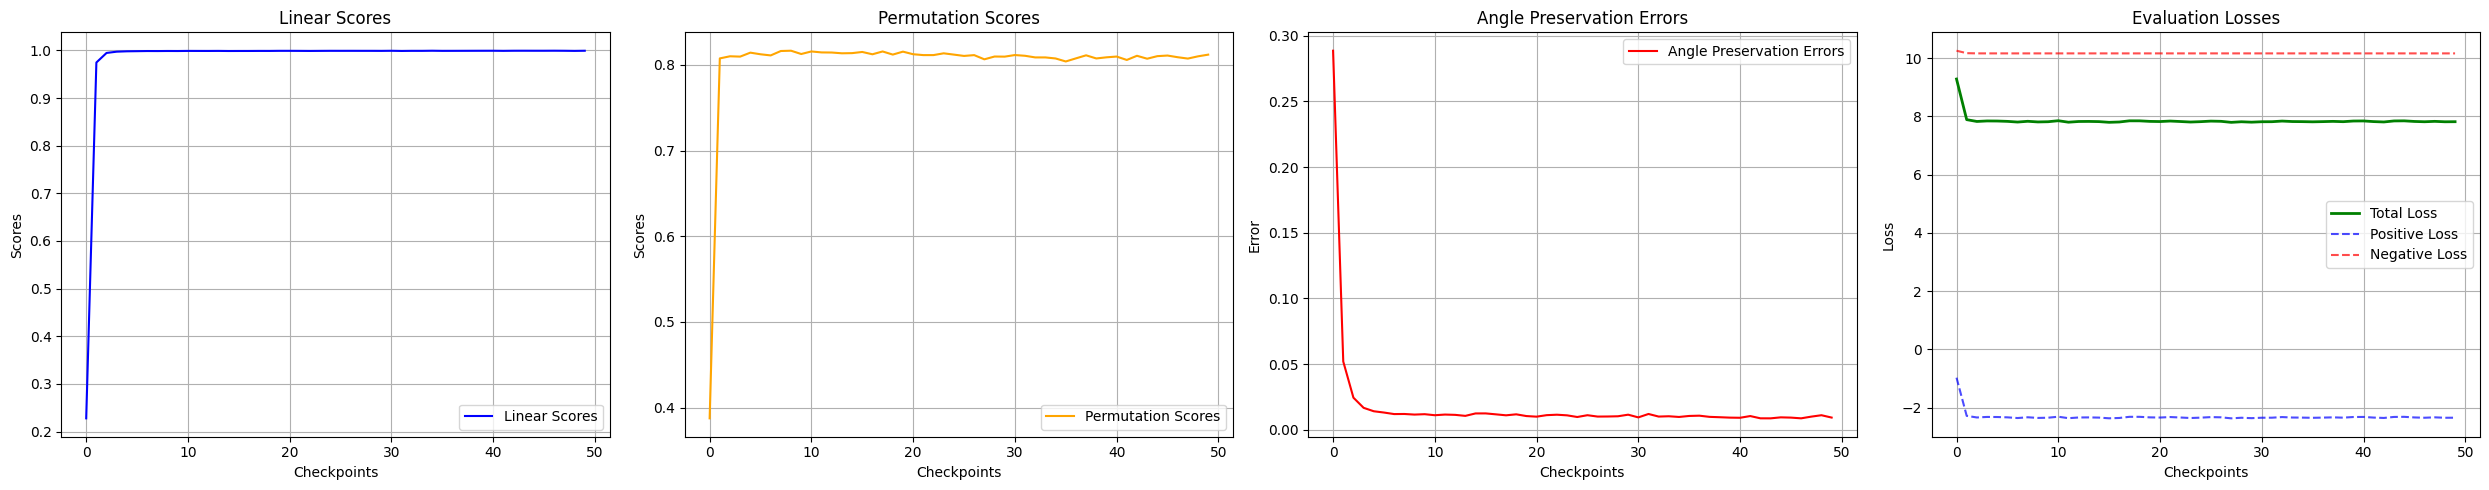

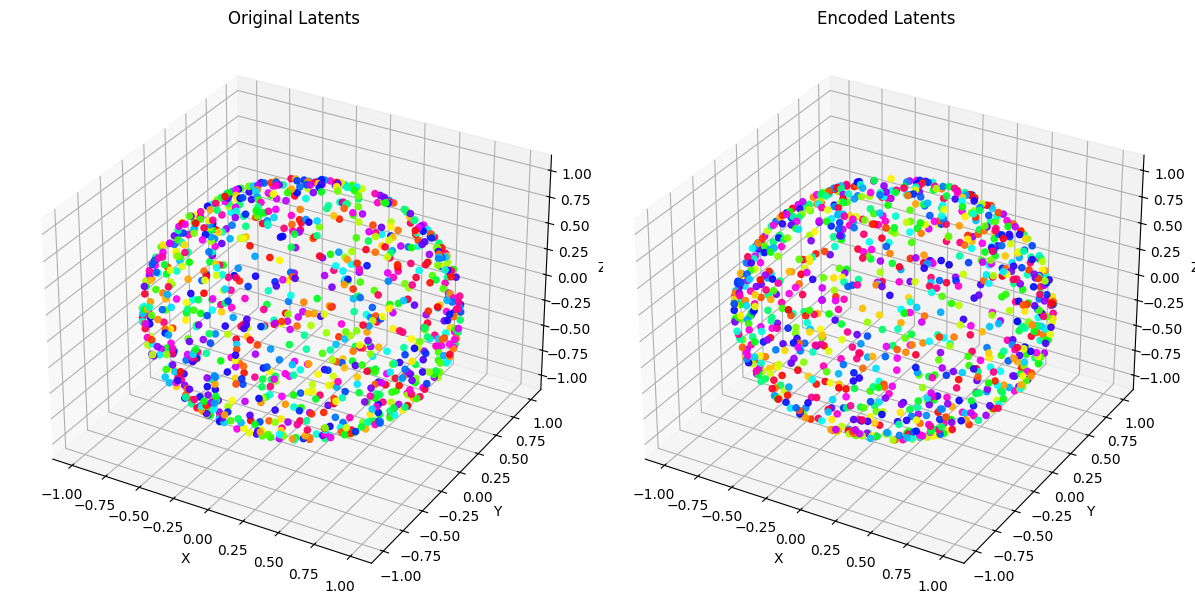

AssertionError: Torch not compiled with CUDA enabled

In [3]:
# 4 Dimensions
perform_experiment(4, 'mlp', 1000)

## Experiment: Linear map to 4 dimensions, Linear Encoder

Linear control score: 1.0
Permutation control score: 1.0
Loss: 8.407546997070312 Pos Loss: -2.969289779663086 Neg Loss: 11.376836776733398 Samples processed: 1 linear disentanglement: 0.6341812014579773 permutation disentanglement: 0.6336941376779409 angle_preservation_error: 0.35018259286880493
Loss: 8.396598815917969 Pos Loss: -2.977113723754883 Neg Loss: 11.373712539672852 Samples processed: 21 linear disentanglement: 0.6430121064186096 permutation disentanglement: 0.6476025502783281 angle_preservation_error: 0.3500312864780426
Loss: 8.395633697509766 Pos Loss: -2.969008207321167 Neg Loss: 11.364642143249512 Samples processed: 41 linear disentanglement: 0.6436888575553894 permutation disentanglement: 0.6507513582794813 angle_preservation_error: 0.3478250205516815
Loss: 8.39171028137207 Pos Loss: -2.960512638092041 Neg Loss: 11.352222442626953 Samples processed: 61 linear disentanglement: 0.6455091238021851 permutation disentanglement: 0.6541403047482929 angle_preservation_error: 0.3

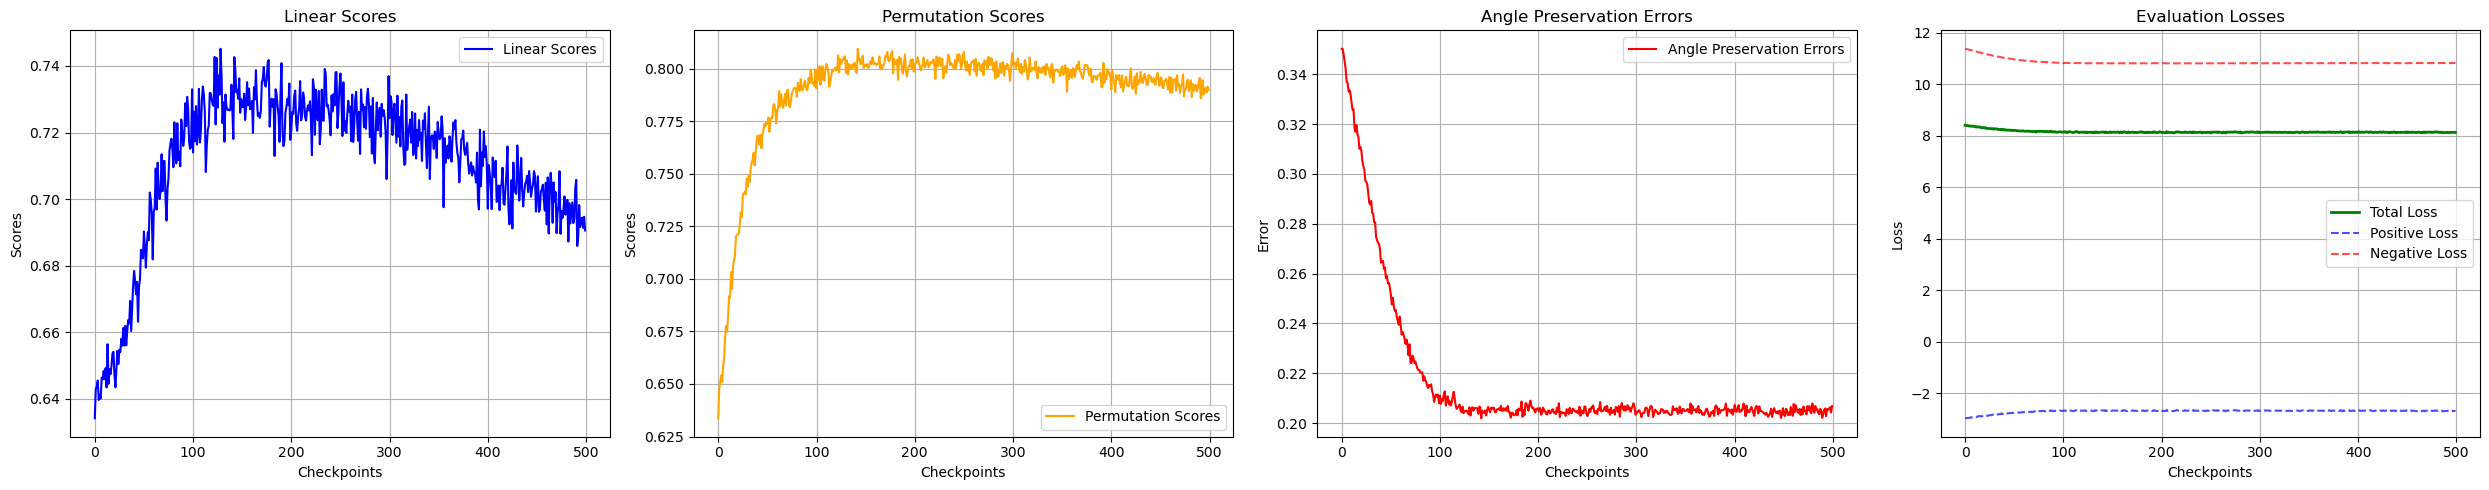

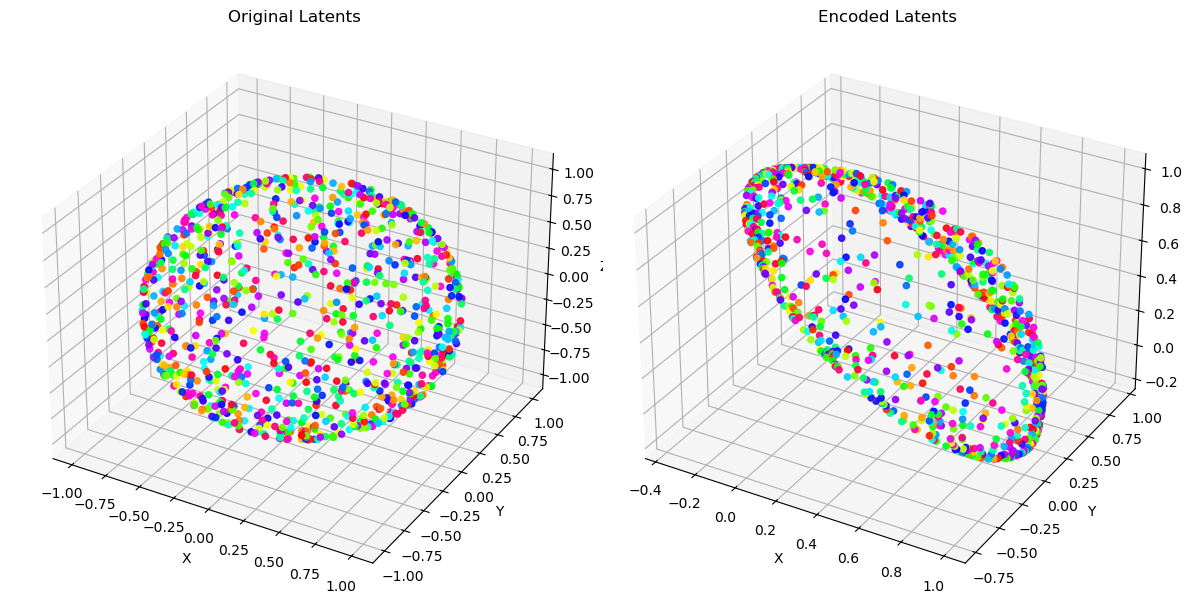

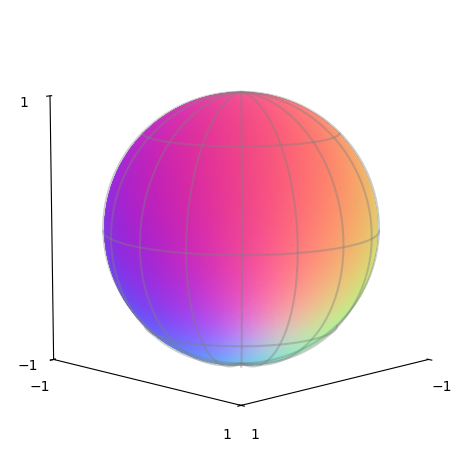

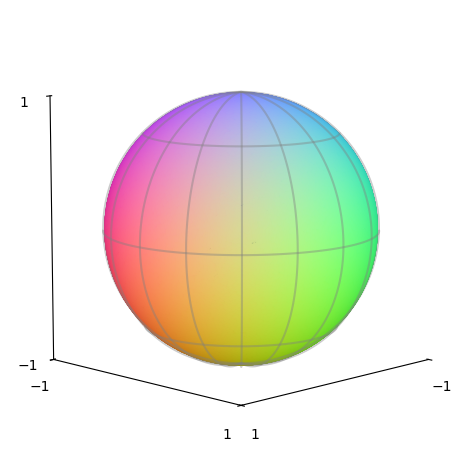

In [9]:
perform_experiment(4, 'linear', 10000)

## Experiment: Linear map to 5 dimensions, MLP Encoder

Linear control score: 1.0
Permutation control score: 0.9999999999999999
Loss: 9.184676170349121 Samples processed: 1 linear disentanglement: 0.35864996910095215 permutation disentanglement: 0.17238207161426544 angle_preservation_error: 0.25437888503074646
Loss: 7.4784698486328125 Samples processed: 21 linear disentanglement: 0.9882748126983643 permutation disentanglement: 0.46493878960609436 angle_preservation_error: 0.039731673896312714
Loss: 7.449426174163818 Samples processed: 41 linear disentanglement: 0.9966788291931152 permutation disentanglement: 0.48746538162231445 angle_preservation_error: 0.01968042366206646
Loss: 7.408267974853516 Samples processed: 61 linear disentanglement: 0.9981133937835693 permutation disentanglement: 0.4816237986087799 angle_preservation_error: 0.015457261353731155
Loss: 7.408631801605225 Samples processed: 81 linear disentanglement: 0.9988682270050049 permutation disentanglement: 0.4861598014831543 angle_preservation_error: 0.01080594677478075
Loss: 7

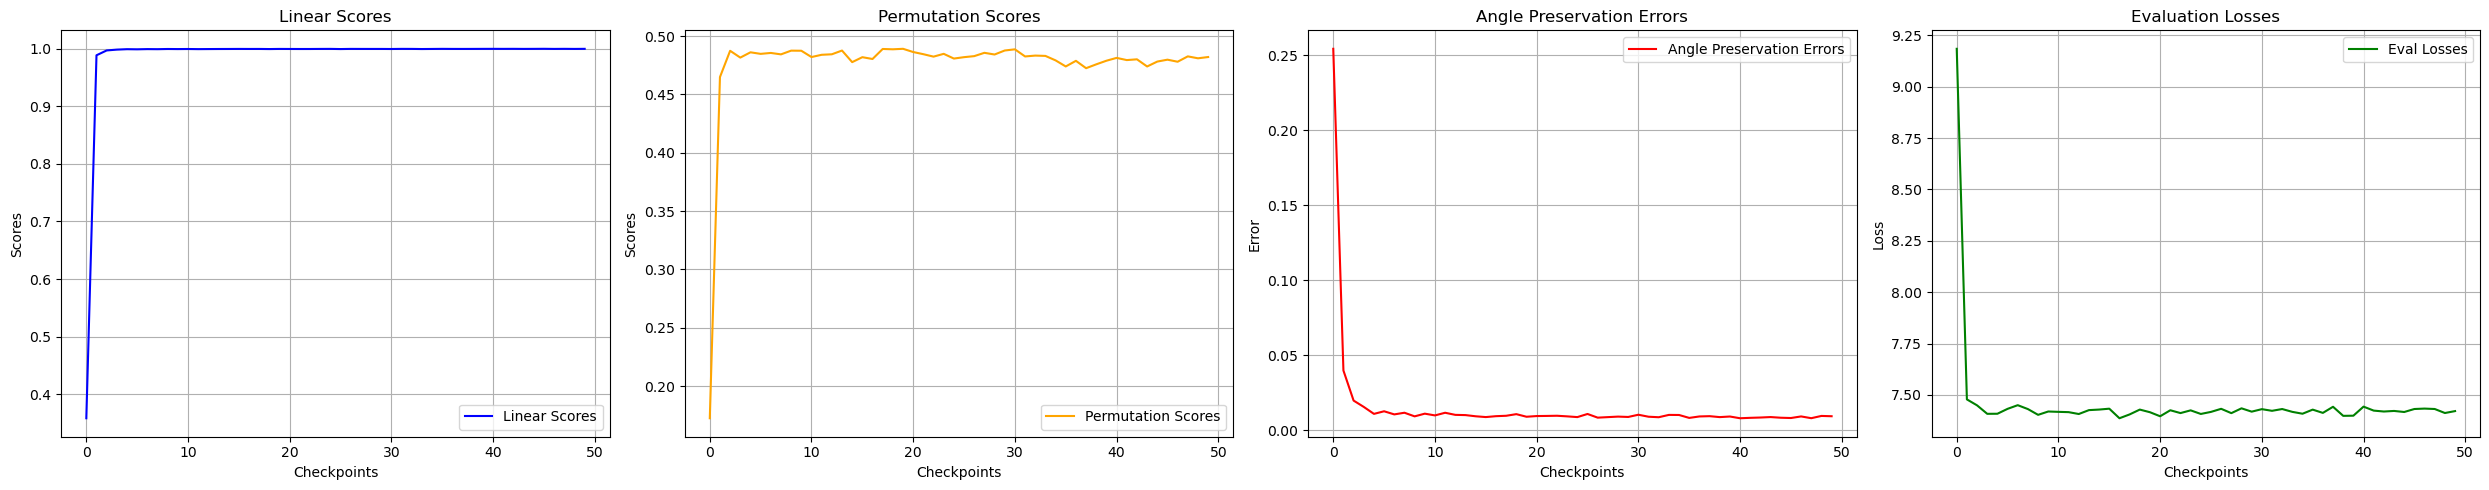

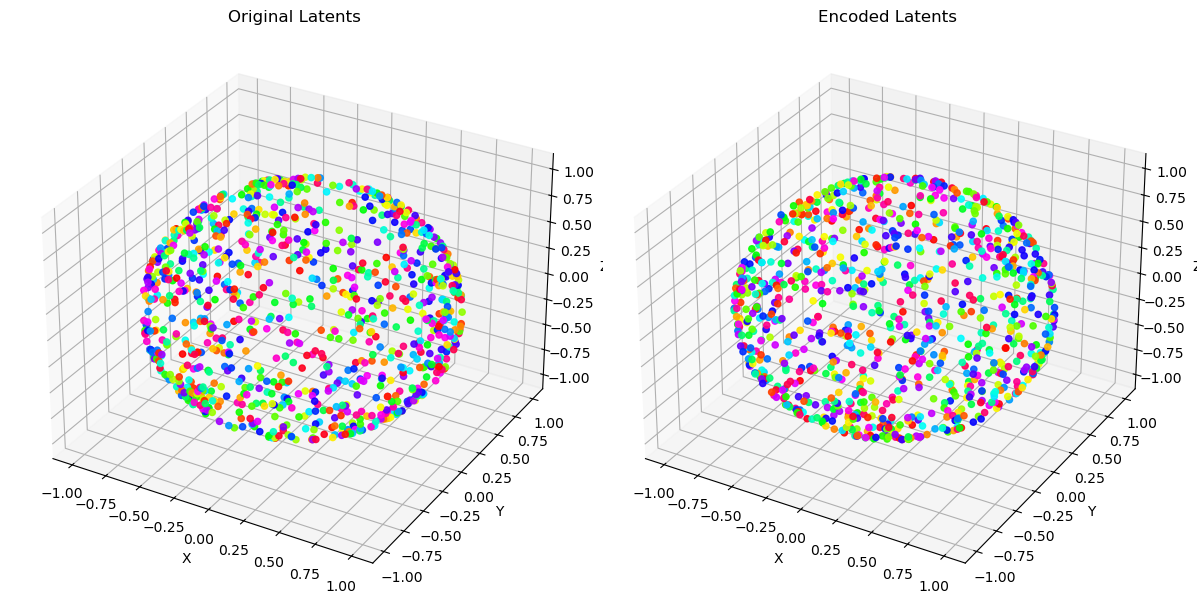

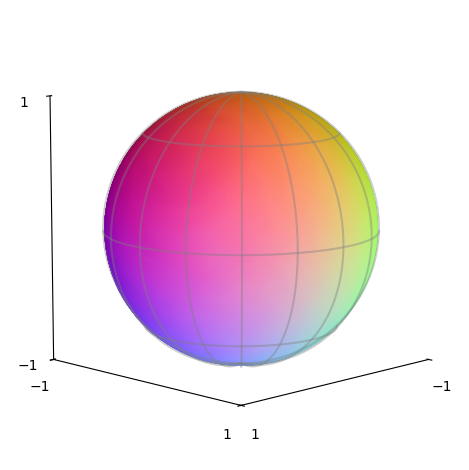

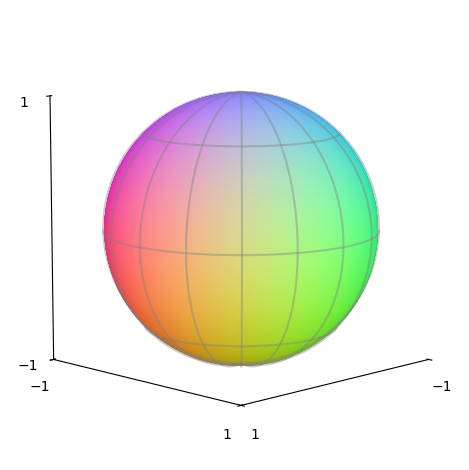

In [62]:
perform_experiment(5, 'mlp', 1000)

# 5 dimensions, linear encoder

Linear control score: 1.0
Permutation control score: 1.0
Loss: 8.470849990844727 Pos Loss: -2.4673287868499756 Neg Loss: 10.938178062438965 Samples processed: 1 linear disentanglement: 0.7577660083770752 permutation disentanglement: 0.7804285985405303 angle_preservation_error: 0.26047563552856445
Loss: 8.466487884521484 Pos Loss: -2.447465419769287 Neg Loss: 10.913951873779297 Samples processed: 21 linear disentanglement: 0.7546609044075012 permutation disentanglement: 0.7809982970590529 angle_preservation_error: 0.2578156292438507
Loss: 8.44633960723877 Pos Loss: -2.456101417541504 Neg Loss: 10.902441024780273 Samples processed: 41 linear disentanglement: 0.7629573941230774 permutation disentanglement: 0.7843111460582497 angle_preservation_error: 0.2525006830692291
Loss: 8.476288795471191 Pos Loss: -2.388671875 Neg Loss: 10.864961624145508 Samples processed: 61 linear disentanglement: 0.7655779719352722 permutation disentanglement: 0.7866410076287339 angle_preservation_error: 0.253304

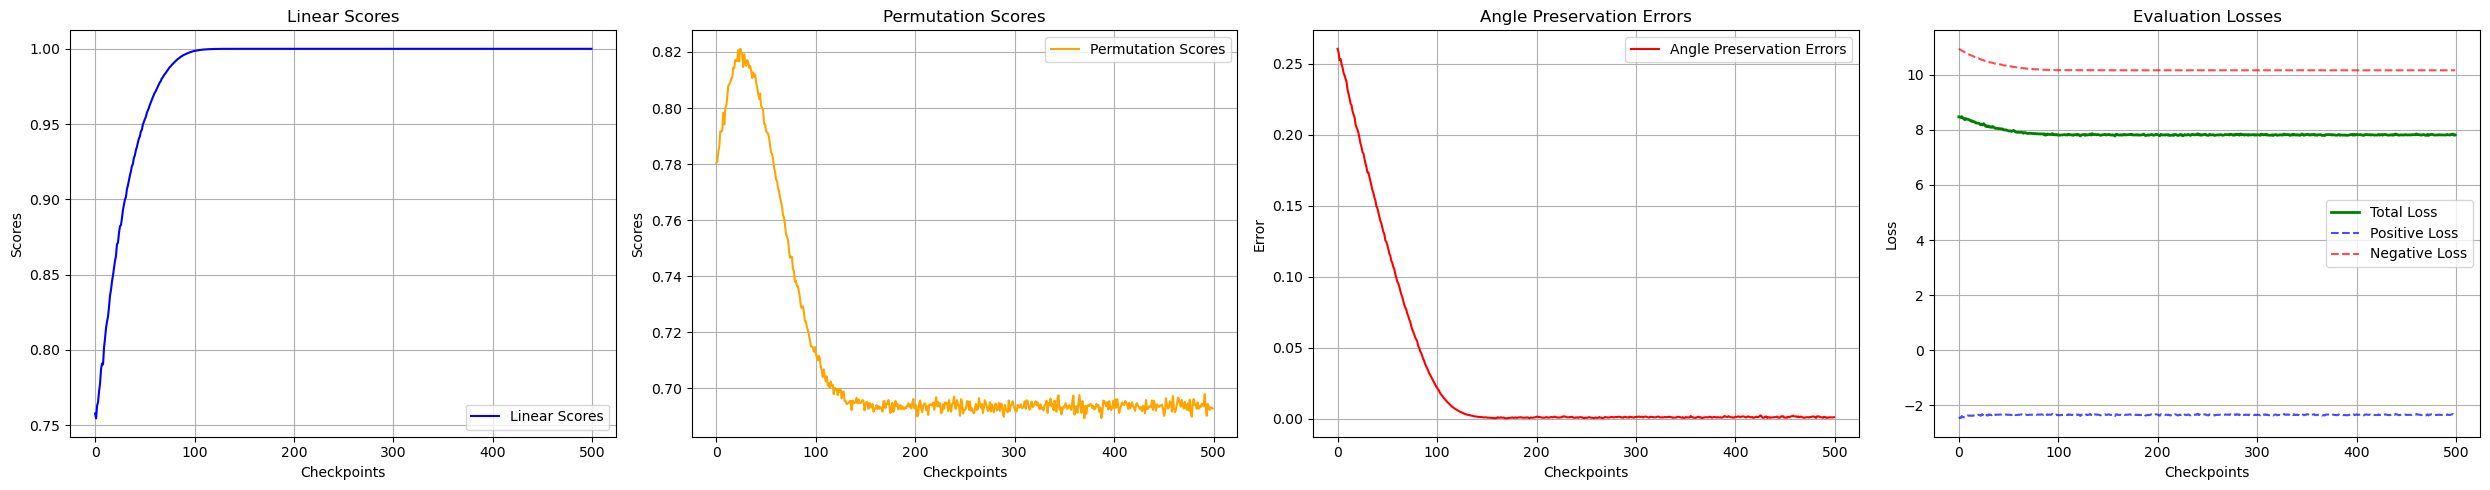

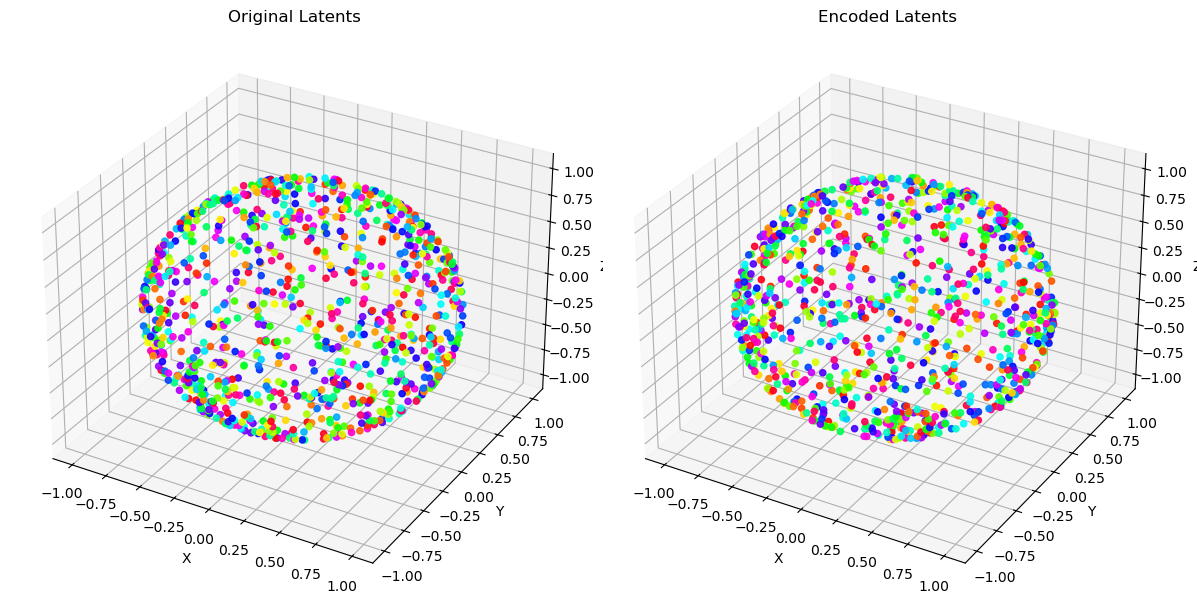

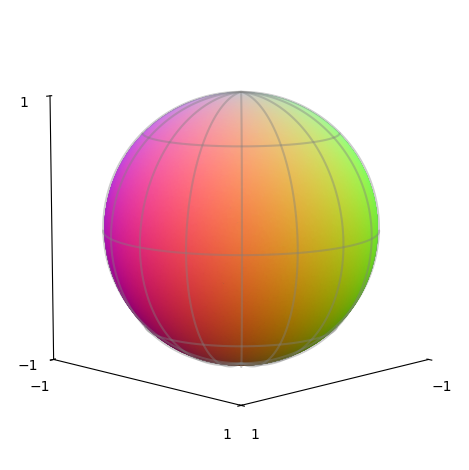

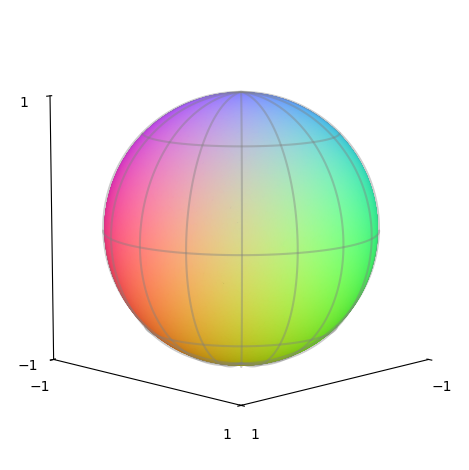

In [16]:
perform_experiment(5, 'linear', 10000)

# 6 Dimensions MLP Encoder

Linear control score: 1.0
Permutation control score: 1.0
Loss: 9.456125259399414 Samples processed: 1 linear disentanglement: 0.2010776847600937 permutation disentanglement: 0.08270331472158432 angle_preservation_error: 0.29461854696273804
Loss: 7.939004421234131 Samples processed: 21 linear disentanglement: 0.6627222895622253 permutation disentanglement: 0.13073240220546722 angle_preservation_error: 0.1465378701686859
Loss: 7.866219520568848 Samples processed: 41 linear disentanglement: 0.7234595417976379 permutation disentanglement: 0.1559206247329712 angle_preservation_error: 0.12494545429944992
Loss: 7.511083126068115 Samples processed: 61 linear disentanglement: 0.9710516333580017 permutation disentanglement: 0.17286066710948944 angle_preservation_error: 0.05360766872763634
Loss: 7.424307823181152 Samples processed: 81 linear disentanglement: 0.9941226840019226 permutation disentanglement: 0.19057722389698029 angle_preservation_error: 0.03209036588668823
Loss: 7.4365363121032715 S

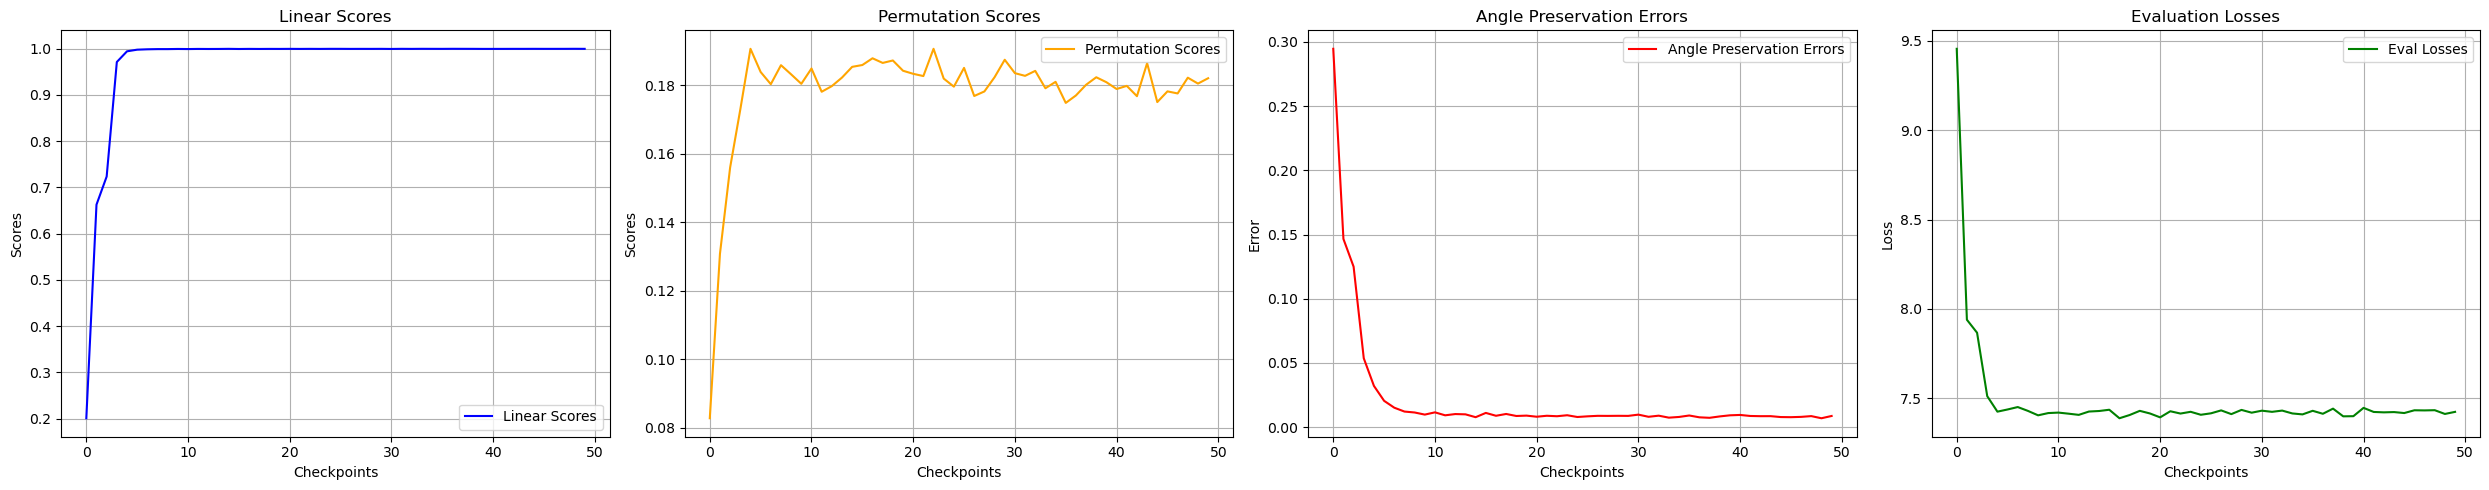

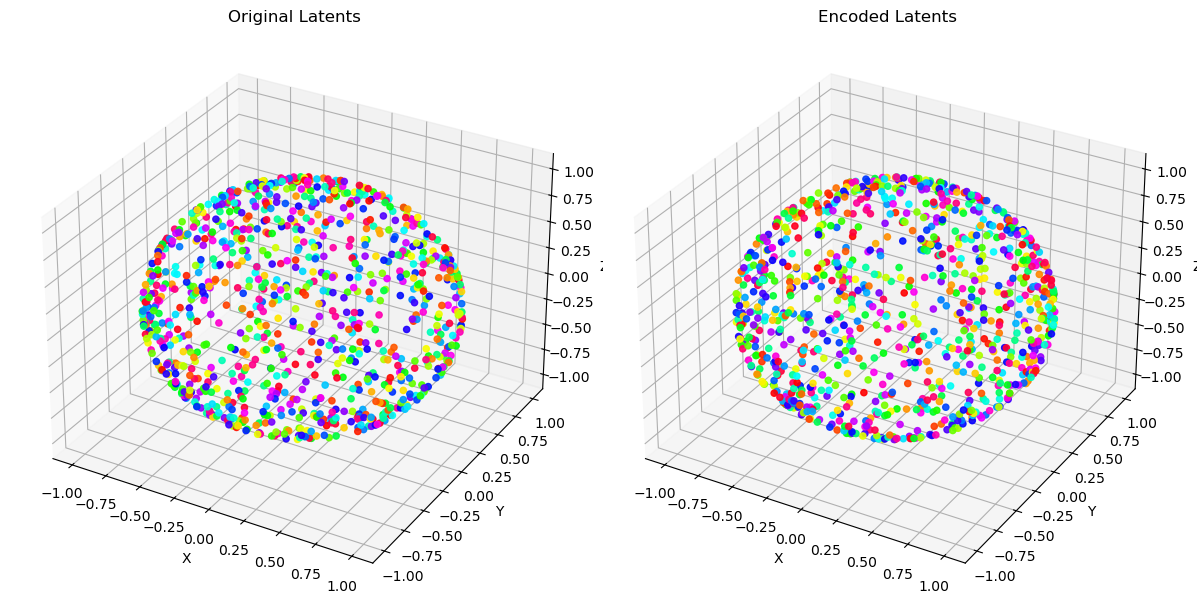

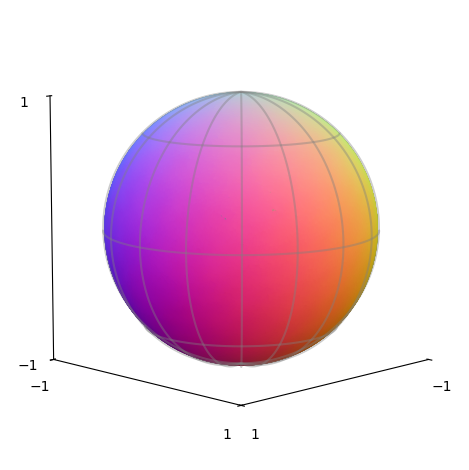

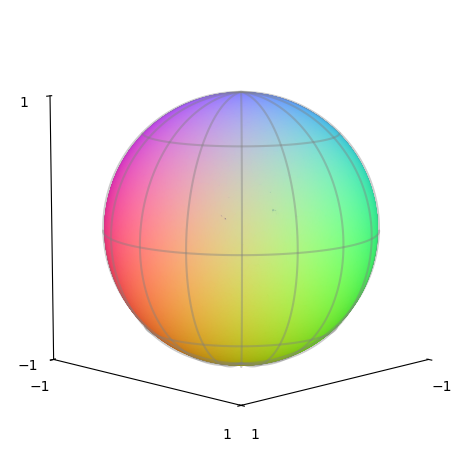

In [66]:
perform_experiment(6, 'mlp', 1000)

# 6 Dimensions Linear Encoder

Linear control score: 1.0
Permutation control score: 1.0
Loss: 8.233203887939453 Samples processed: 1 linear disentanglement: 0.8112566471099854 permutation disentanglement: 0.2368728369474411 angle_preservation_error: 0.19614027440547943
Loss: 8.209412574768066 Samples processed: 21 linear disentanglement: 0.8233636021614075 permutation disentanglement: 0.237723246216774 angle_preservation_error: 0.19036072492599487
Loss: 8.222698211669922 Samples processed: 41 linear disentanglement: 0.8238964080810547 permutation disentanglement: 0.2400931566953659 angle_preservation_error: 0.1903575360774994
Loss: 8.166144371032715 Samples processed: 61 linear disentanglement: 0.8269171118736267 permutation disentanglement: 0.23009730875492096 angle_preservation_error: 0.1869548112154007
Loss: 8.135031700134277 Samples processed: 81 linear disentanglement: 0.8316075205802917 permutation disentanglement: 0.237756609916687 angle_preservation_error: 0.18527528643608093
Loss: 8.150333404541016 Samples 

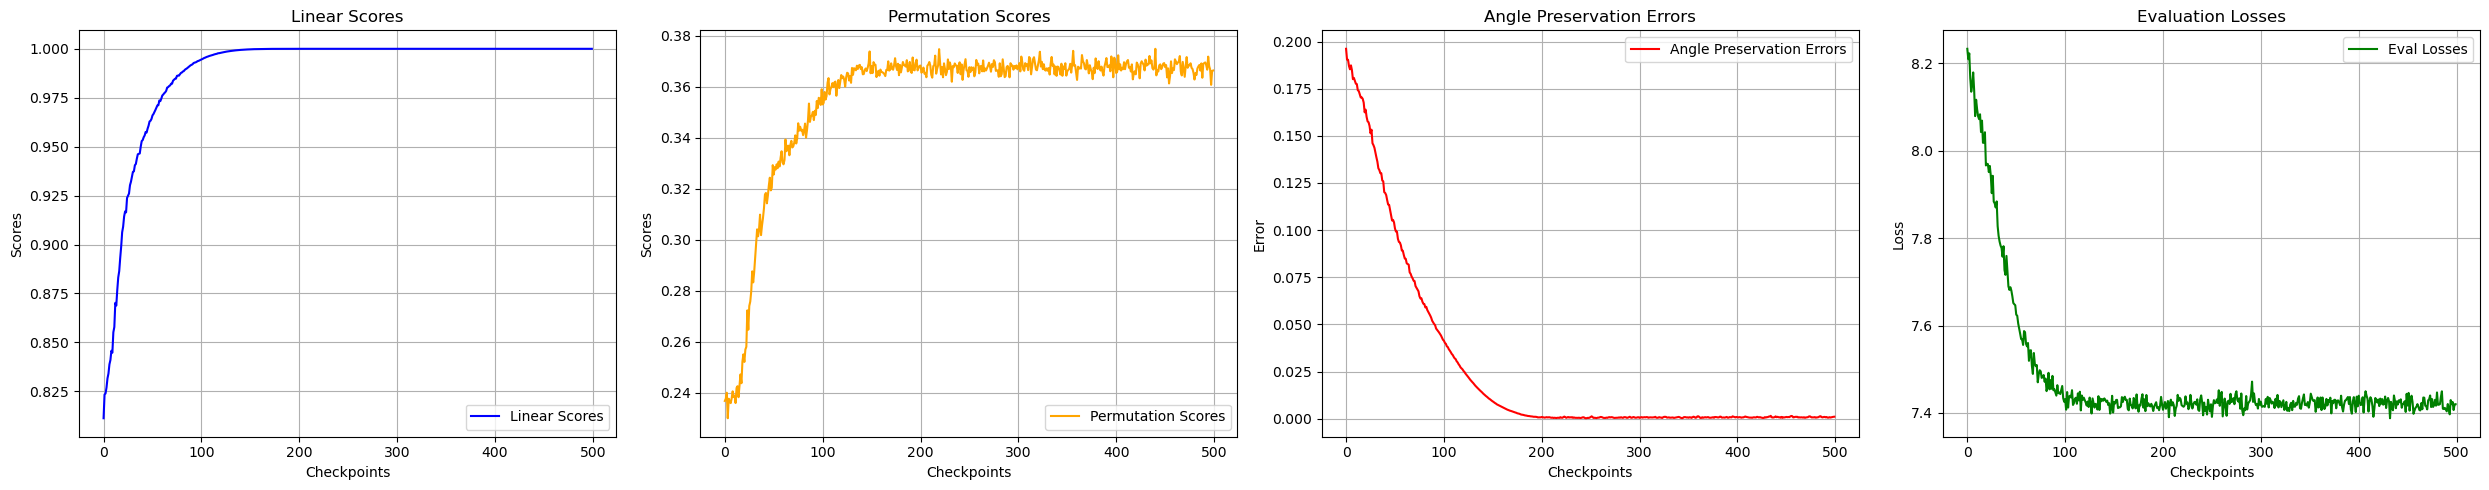

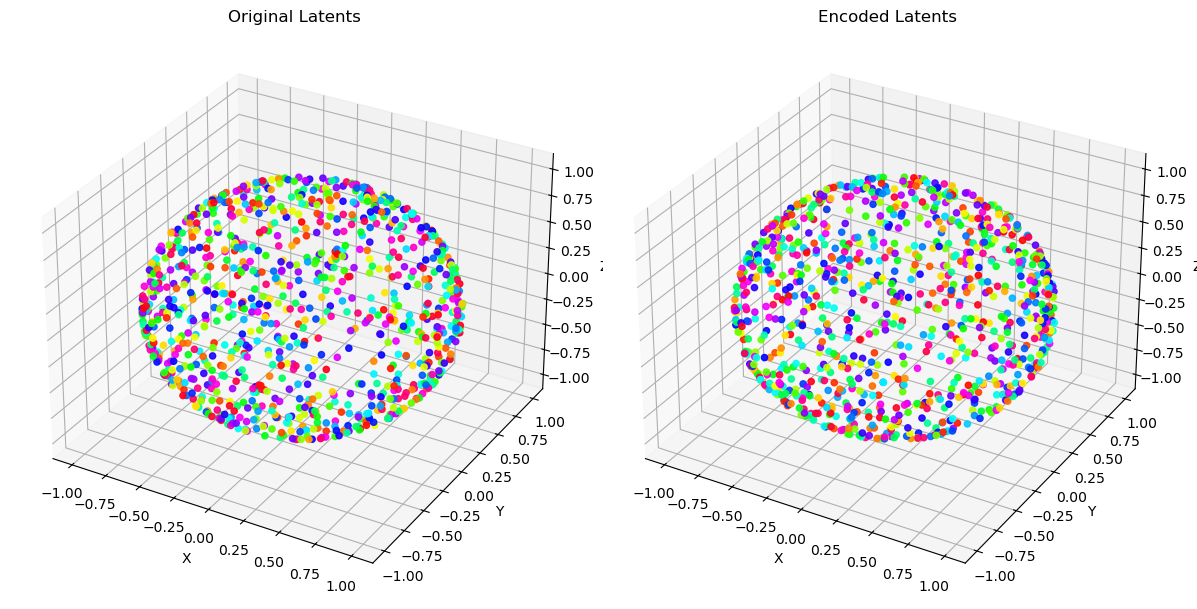

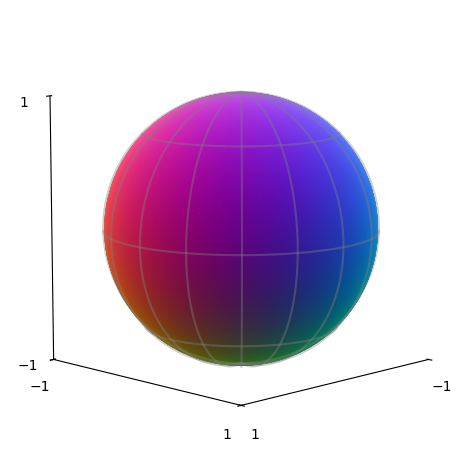

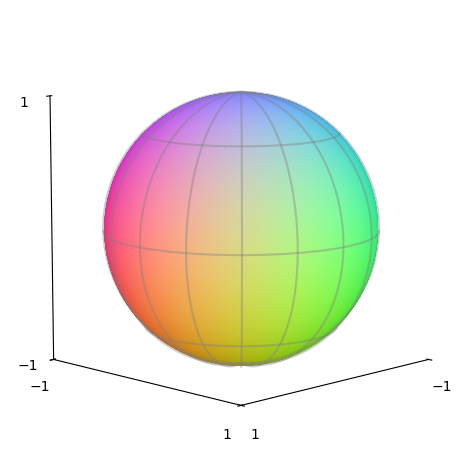

In [67]:
# 6 Dimensions

perform_experiment(6, 'linear', 10000)

Linear control score: 1.0
Permutation control score: 1.0
Loss: 8.924330711364746 Samples processed: 1 linear disentanglement: 0.4641733467578888 permutation disentanglement: 0.2357158213853836 angle_preservation_error: 0.22100797295570374
Loss: 7.905312538146973 Samples processed: 21 linear disentanglement: 0.7013700604438782 permutation disentanglement: 0.36298608779907227 angle_preservation_error: 0.13594858348369598
Loss: 7.484092712402344 Samples processed: 41 linear disentanglement: 0.9867988228797913 permutation disentanglement: 0.3841681480407715 angle_preservation_error: 0.04050865396857262
Loss: 7.4141154289245605 Samples processed: 61 linear disentanglement: 0.9965359568595886 permutation disentanglement: 0.39165982604026794 angle_preservation_error: 0.021677250042557716
Loss: 7.410081386566162 Samples processed: 81 linear disentanglement: 0.9982393383979797 permutation disentanglement: 0.39014220237731934 angle_preservation_error: 0.01576281152665615
Loss: 7.4332275390625 Sa

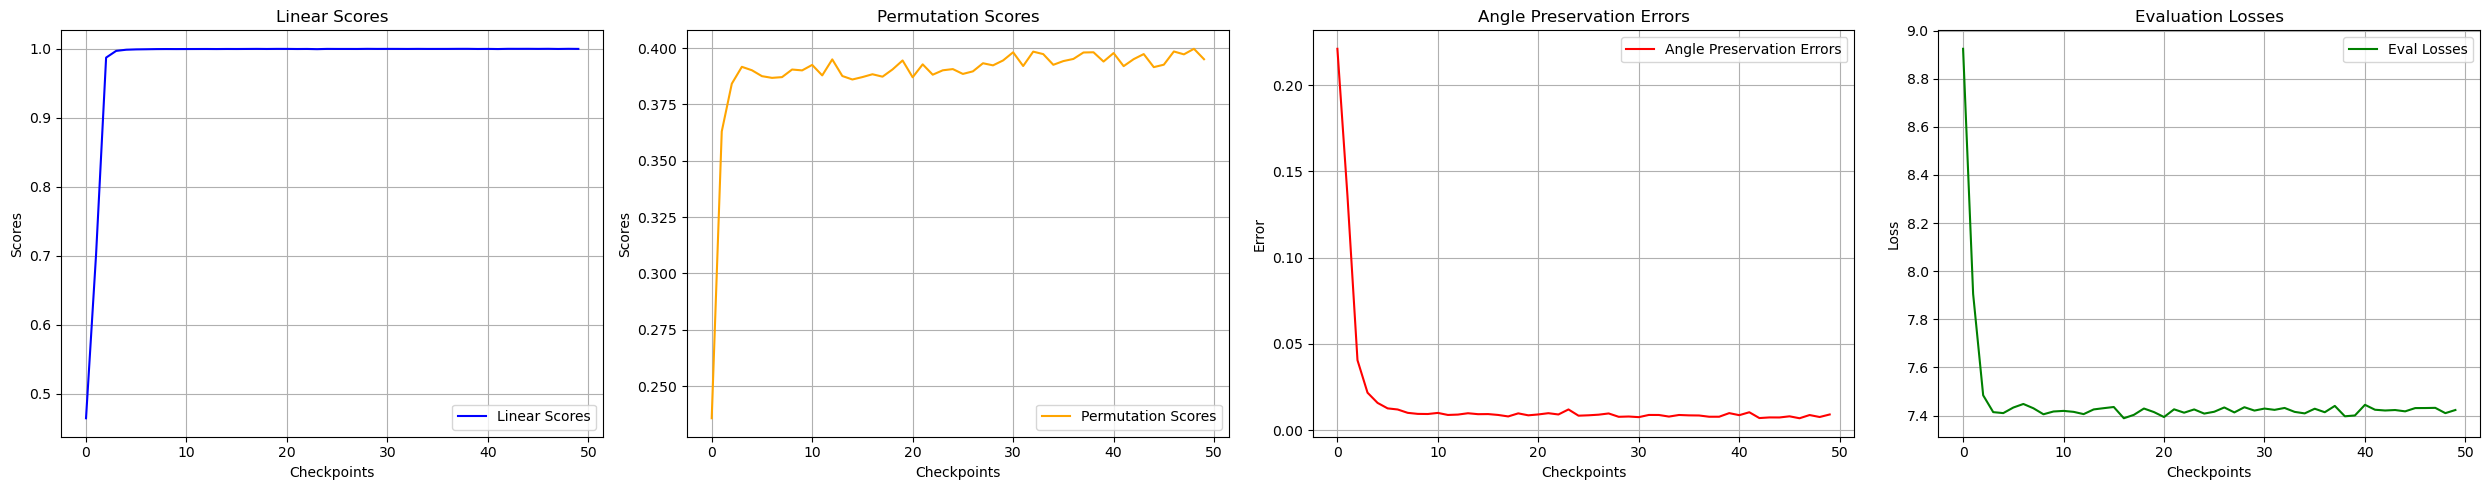

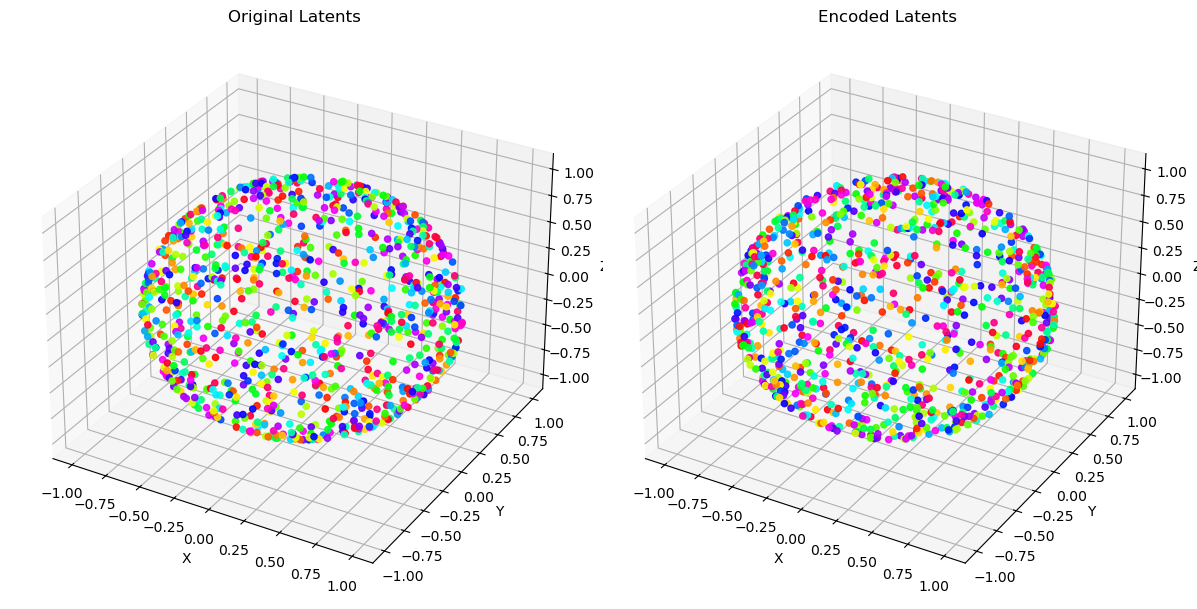

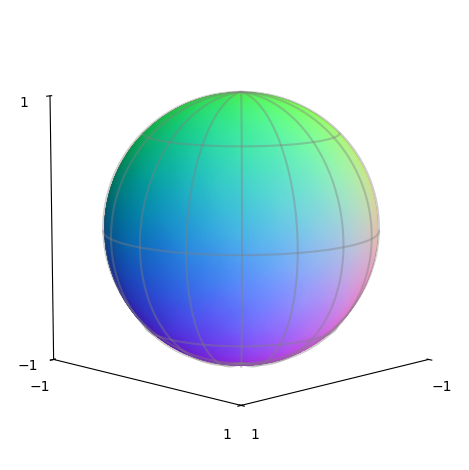

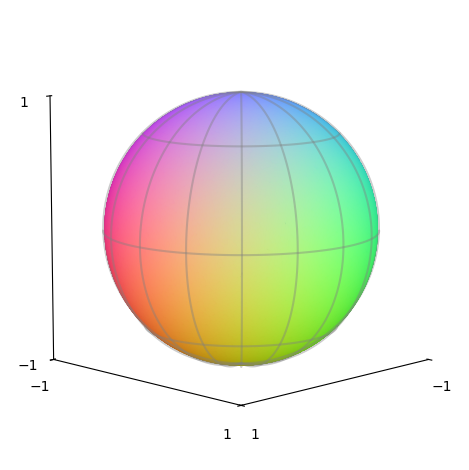

In [68]:
# 7 Dimensions

perform_experiment(7, 'mlp', 1000)

Linear control score: 1.0
Permutation control score: 1.0
Loss: 8.374744415283203 Samples processed: 1 linear disentanglement: 0.799196183681488 permutation disentanglement: 0.2517506778240204 angle_preservation_error: 0.24486562609672546
Loss: 8.358495712280273 Samples processed: 21 linear disentanglement: 0.8072905540466309 permutation disentanglement: 0.2503204047679901 angle_preservation_error: 0.24308401346206665
Loss: 8.375336647033691 Samples processed: 41 linear disentanglement: 0.8108609318733215 permutation disentanglement: 0.2499152570962906 angle_preservation_error: 0.23917251825332642
Loss: 8.291730880737305 Samples processed: 61 linear disentanglement: 0.8190476298332214 permutation disentanglement: 0.25408369302749634 angle_preservation_error: 0.2359716296195984
Loss: 8.273838996887207 Samples processed: 81 linear disentanglement: 0.8268681168556213 permutation disentanglement: 0.2541702091693878 angle_preservation_error: 0.23342320322990417
Loss: 8.276559829711914 Sample

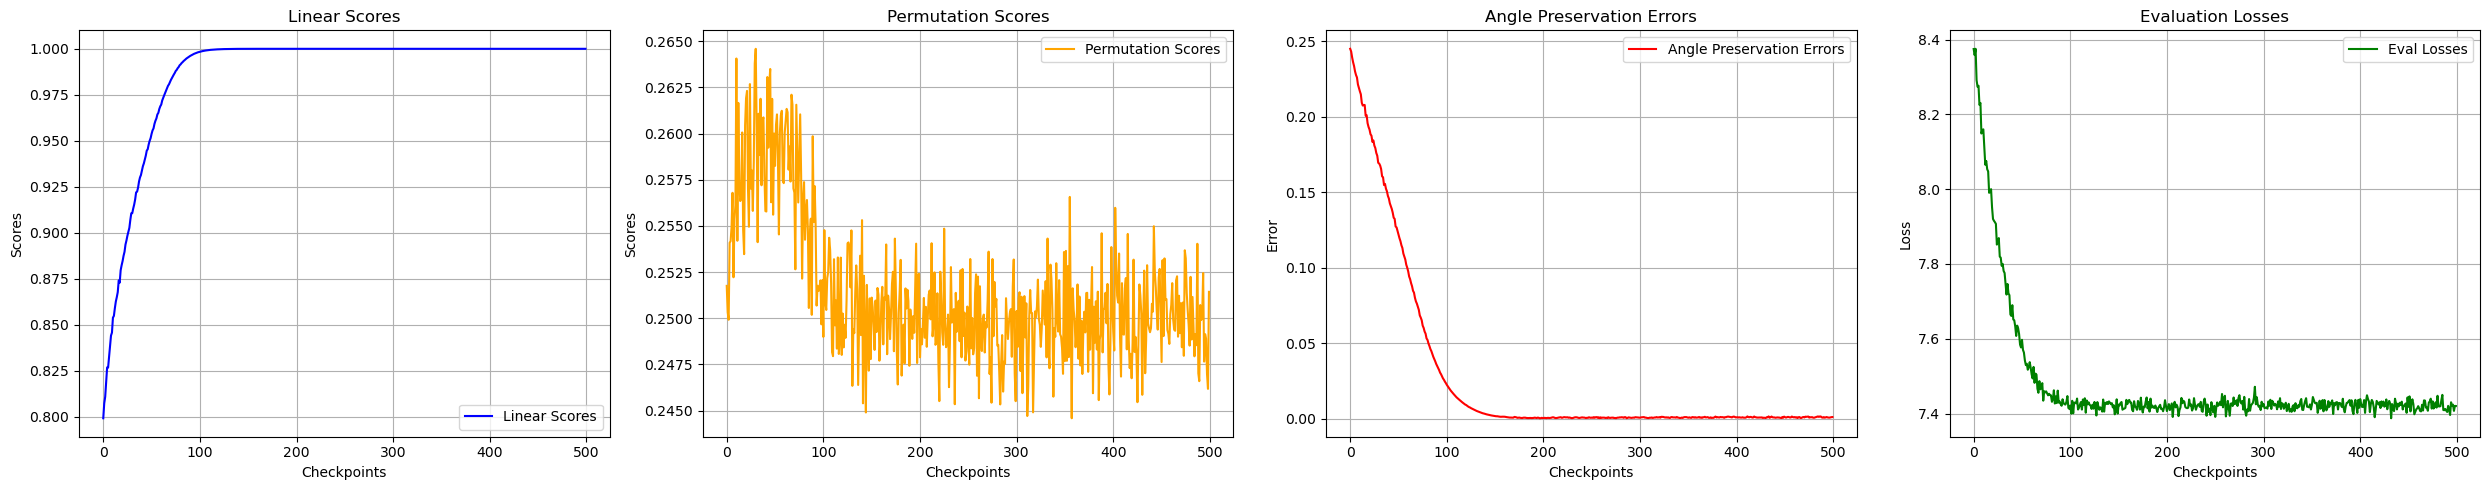

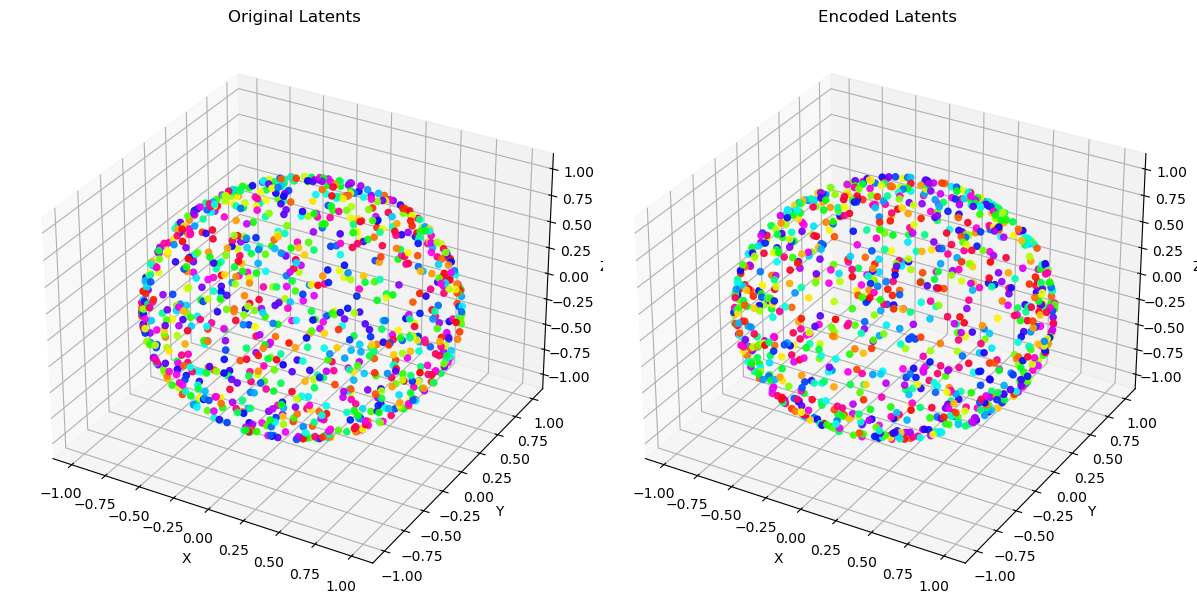

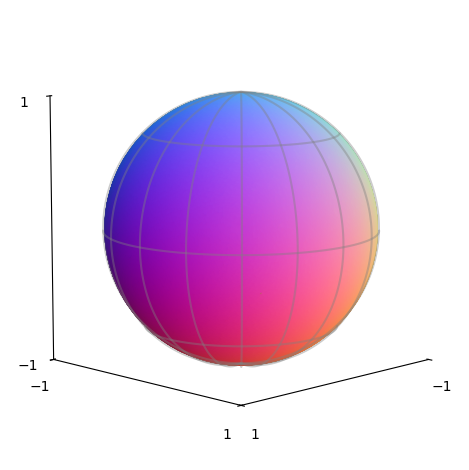

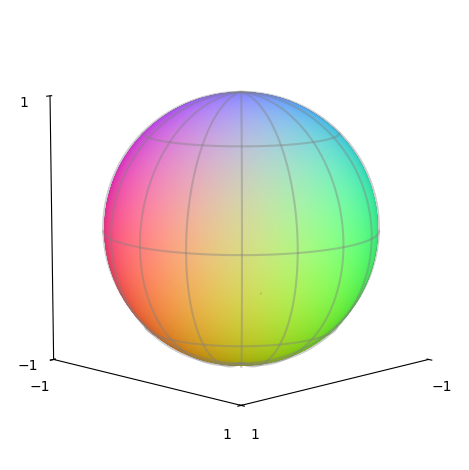

In [69]:
perform_experiment(7, 'linear', 10000)